In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler , LabelEncoder

In [2]:
# set NumPy options
np.set_printoptions(suppress=True)
pd.set_option('display.max_rows', 20)

# read CSV data with Pandas
data = pd.read_csv("dwad.csv")

# setup data column
data.columns = ["V" + str(i) for i in range(1, len(data.columns) + 1)]
# independent variables data
X = data.loc[:, "V2":]
# dependent variable data
y = data.V1
daw = y.quantile([0.01, 0.25, 0.5, 0.75, 0.99])
y = pd.cut( y, bins=daw, labels=['1', '2', '3', '4'], include_lowest=True).astype('string')
y = y.fillna('1')

## Data:
          V1        V2        V3        V4        V5        V6        V7  \
0      0.200 -0.433648 -1.121270 -0.616535 -1.535329 -0.163677  0.982502   
1      0.250 -0.433648  1.941532 -0.031690  1.392585 -0.163677 -0.635850   
2      0.490 -0.433648 -1.121270 -0.031690  1.392585 -0.163677 -0.635850   
3      0.215 -0.433648 -1.121270  0.553155 -0.932523  1.429560 -0.635850   
4      0.145 -0.433648  0.716411 -0.031690  1.134239  0.023763 -0.635850   
...      ...       ...       ...       ...       ...       ...       ...   
12589  0.079  3.564988  0.103851 -1.201380 -0.157487 -0.819715  0.982502   
12590  0.105  1.165806  0.716411 -1.201380  0.014743 -1.475754  0.982502   
12591  0.180 -0.433648  0.103851 -0.031690  0.875894 -0.163677 -0.635850   
12592  0.300  3.564988  0.103851 -1.201380  0.186973 -1.194595  0.982502   
12593  0.150 -0.433648  0.103851 -0.031690  0.962009  0.023763 -0.635850   

             V8        V9       V10       V11       V12       V13       V14  


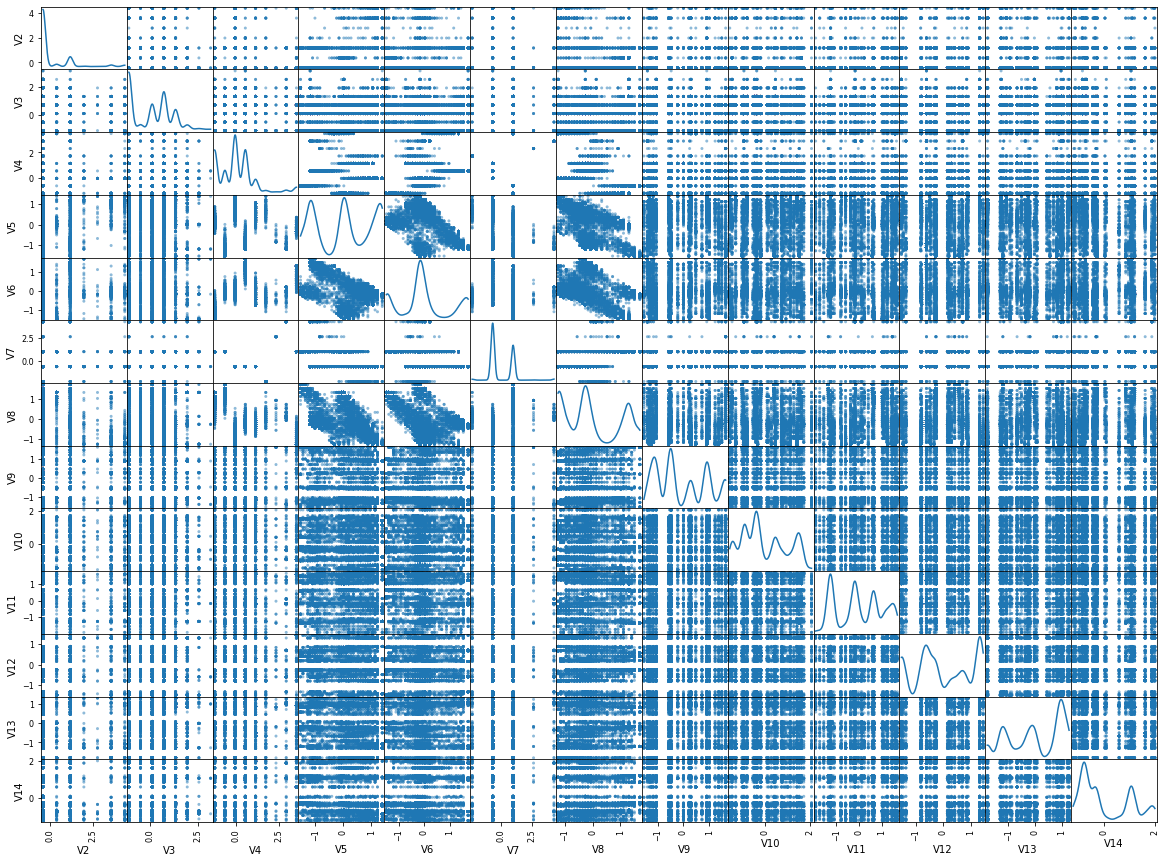

V2    -0.004066
V3     0.000493
V4    -0.003130
V5     0.003064
V6     0.003298
V7     0.010386
V8     0.003312
V9     0.000103
V10    0.000037
V11   -0.000051
V12    0.000120
V13    0.000022
V14    0.000053
dtype: float64
V2     0.989780
V3     1.000046
V4     0.993804
V5     0.994500
V6     0.993955
V7     0.928868
V8     0.992993
V9     0.999973
V10    1.000031
V11    1.000024
V12    0.999949
V13    1.000037
V14    1.000022
dtype: float64
V2     4.364715
V3     3.166653
V4     3.477382
V5     1.392585
V6     1.710719
V7     4.219206
V8     1.699753
V9     1.639739
V10    2.075488
V11    1.669134
V12    1.446224
V13    1.281567
V14    2.005895
dtype: float64
V2    -0.433648
V3    -1.121270
V4    -1.201380
V5    -1.535329
V6    -1.475754
V7    -2.254202
V8    -1.251727
V9    -1.533044
V10   -1.555747
V11   -1.904242
V12   -1.508115
V13   -1.790203
V14   -1.230738
dtype: float64


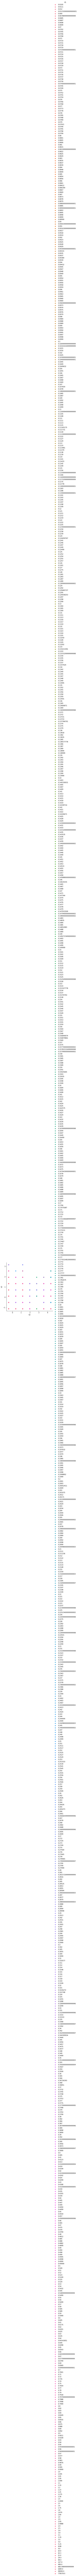

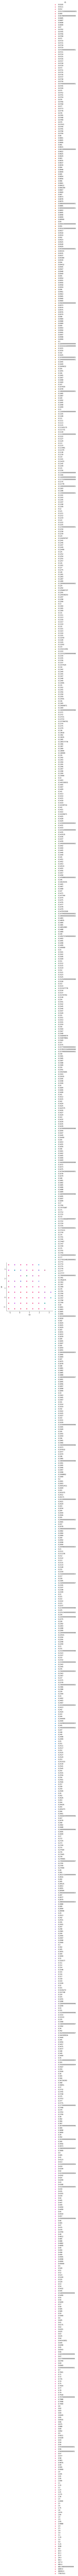

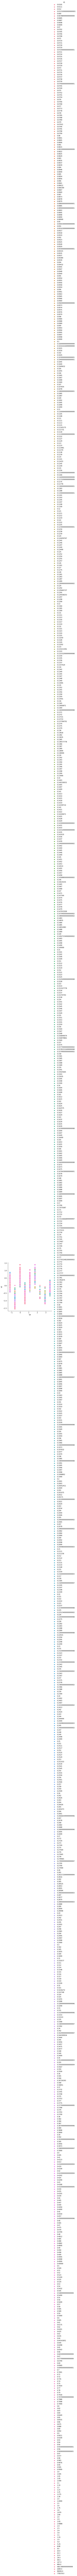

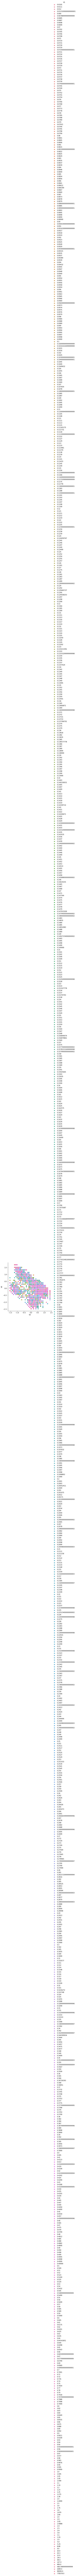

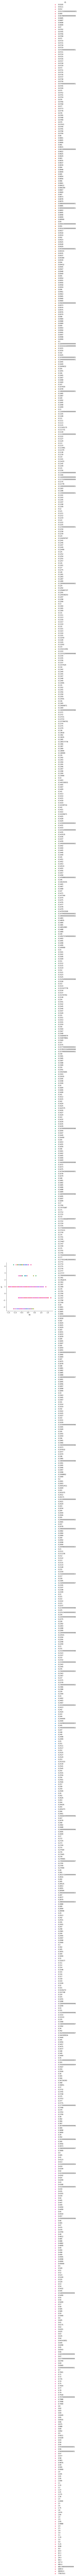

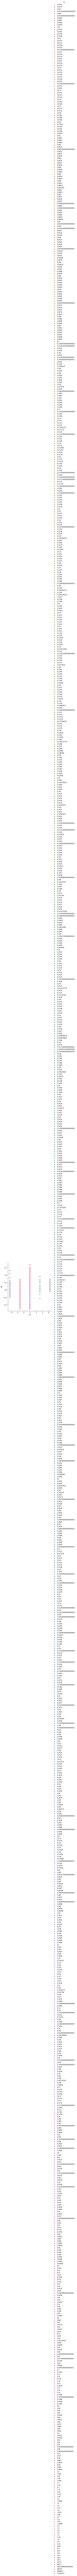

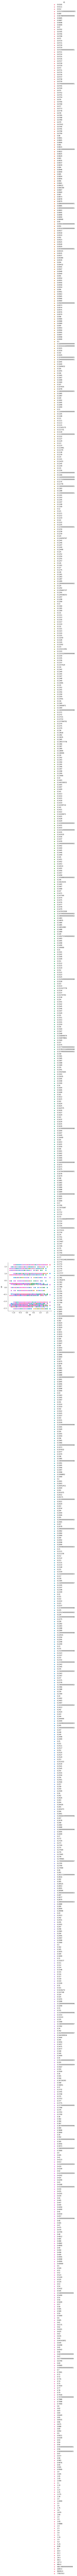

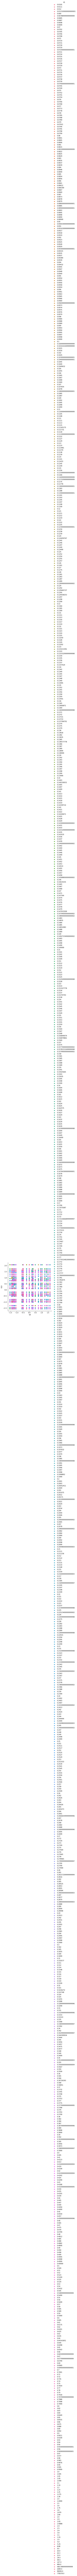

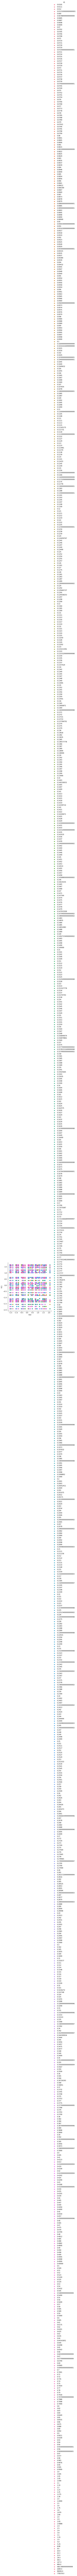

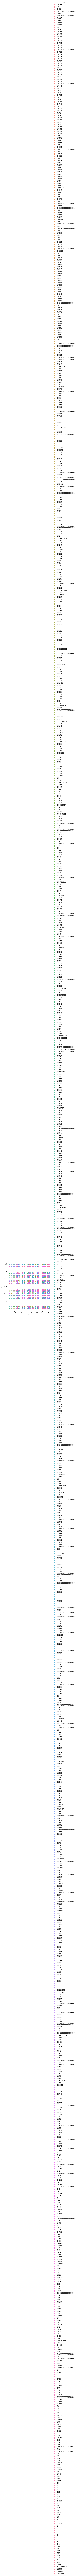

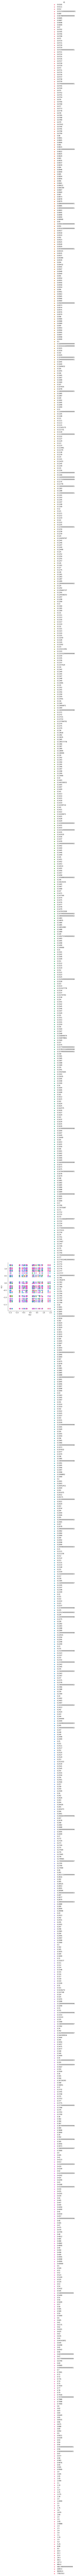

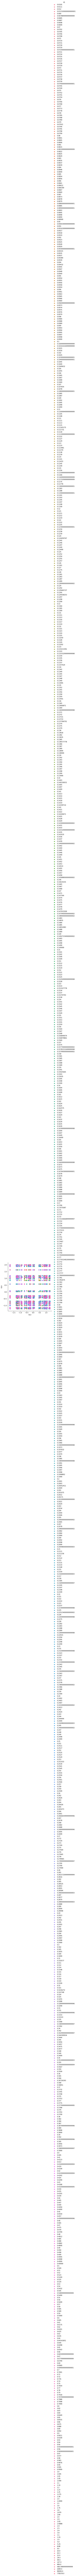

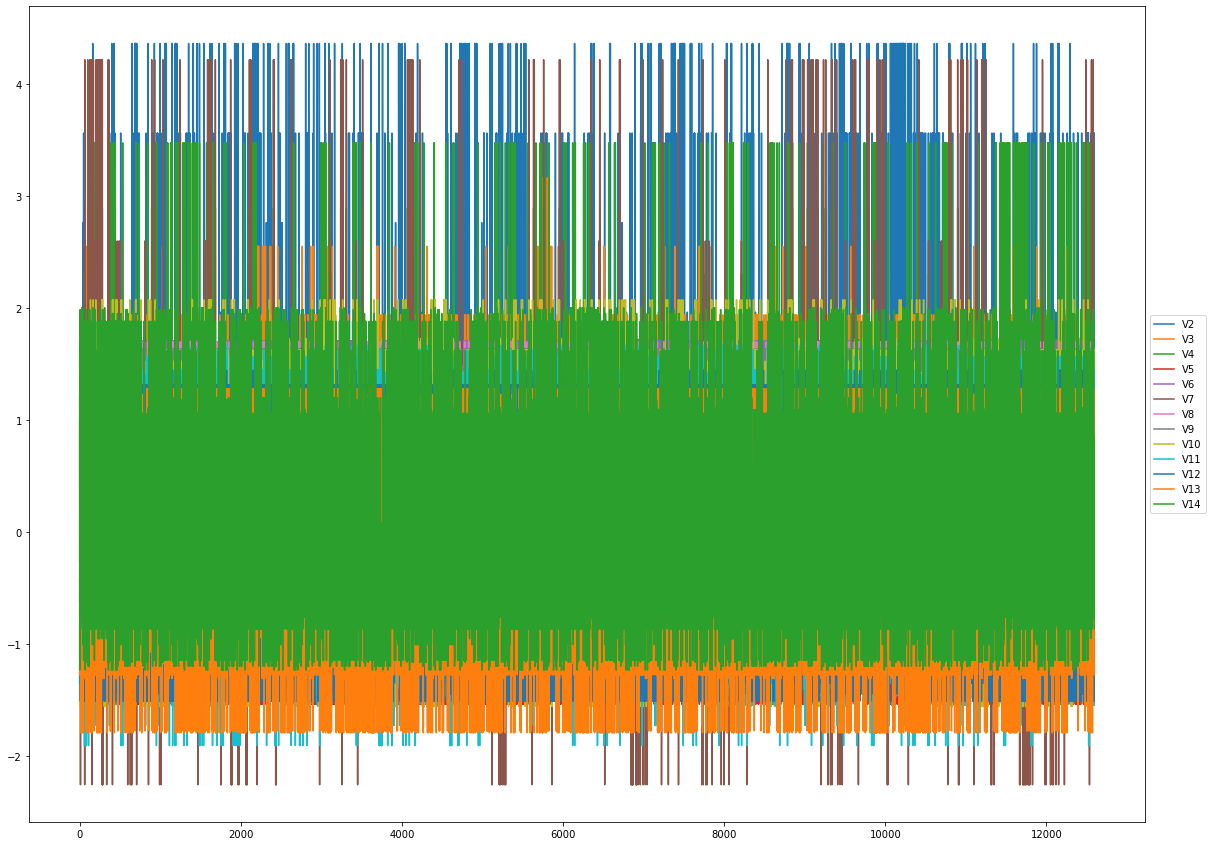

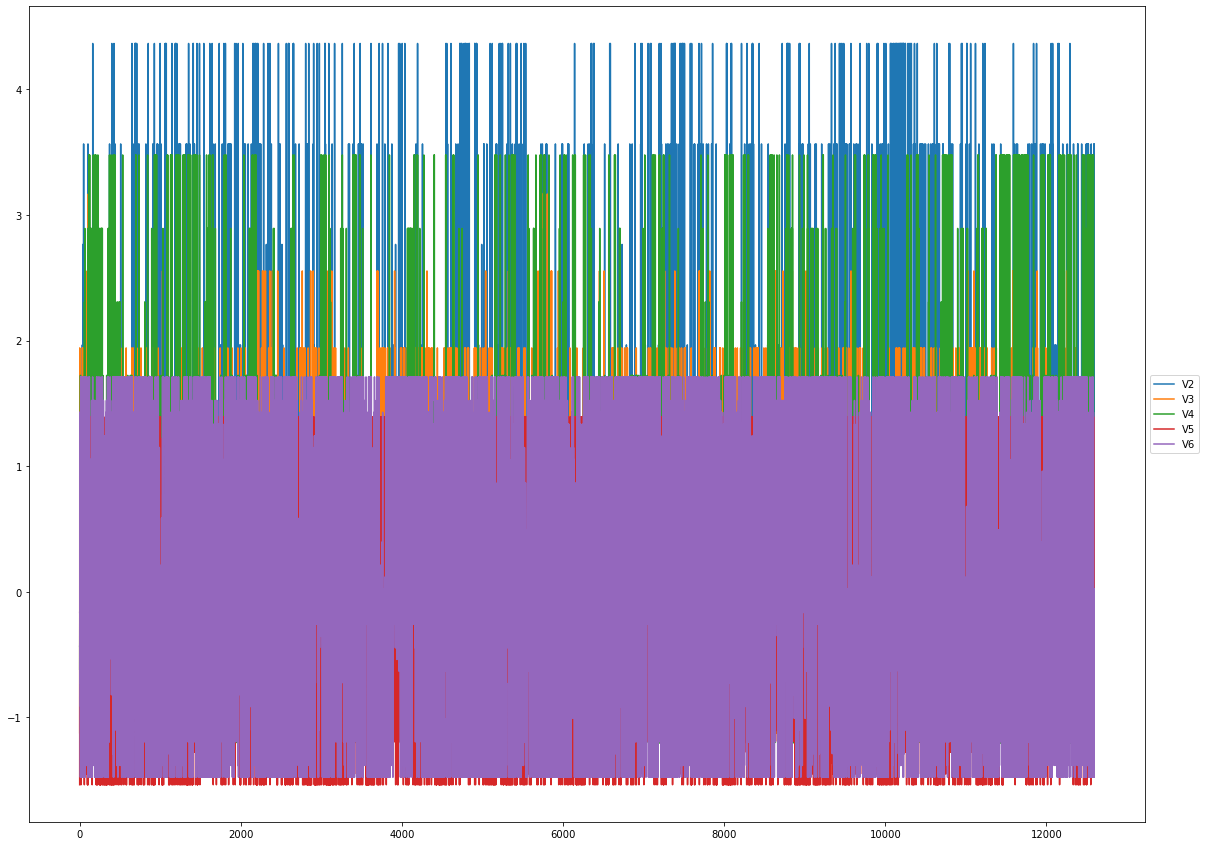

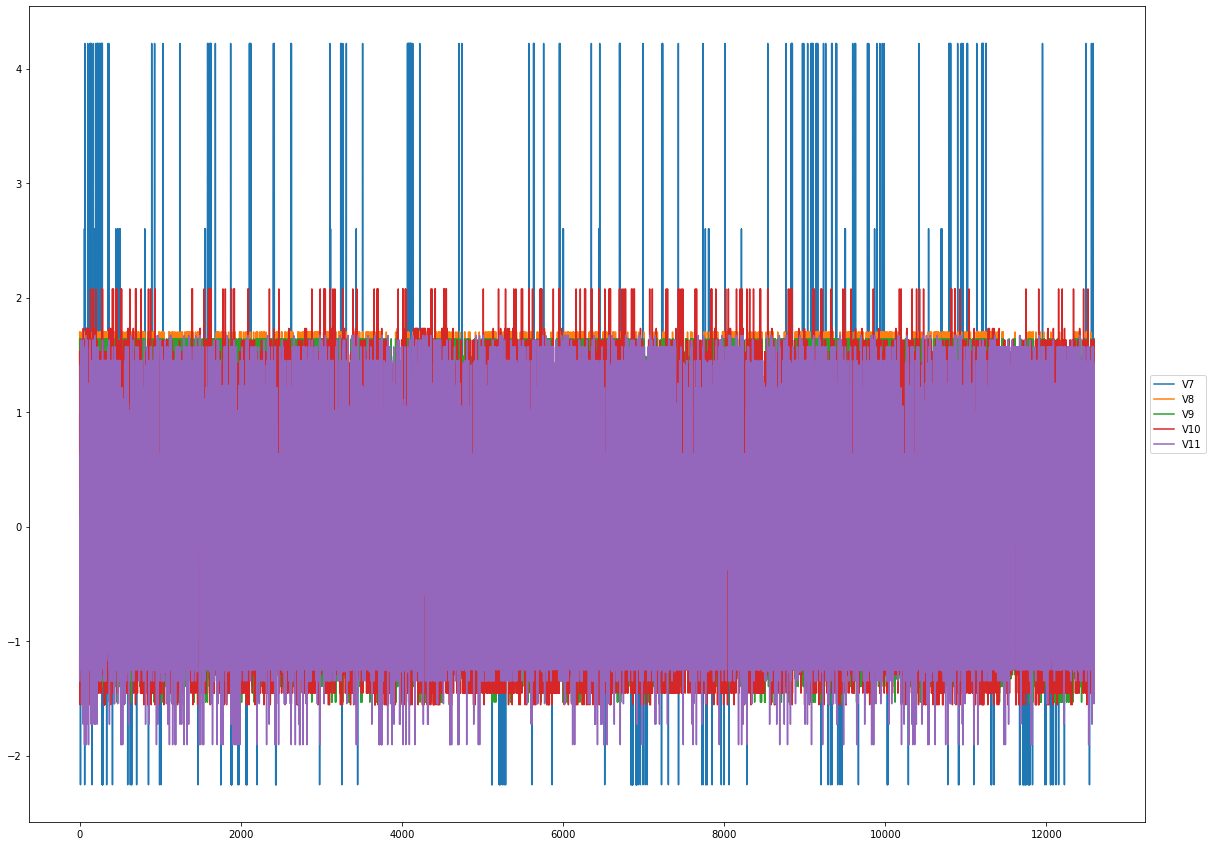

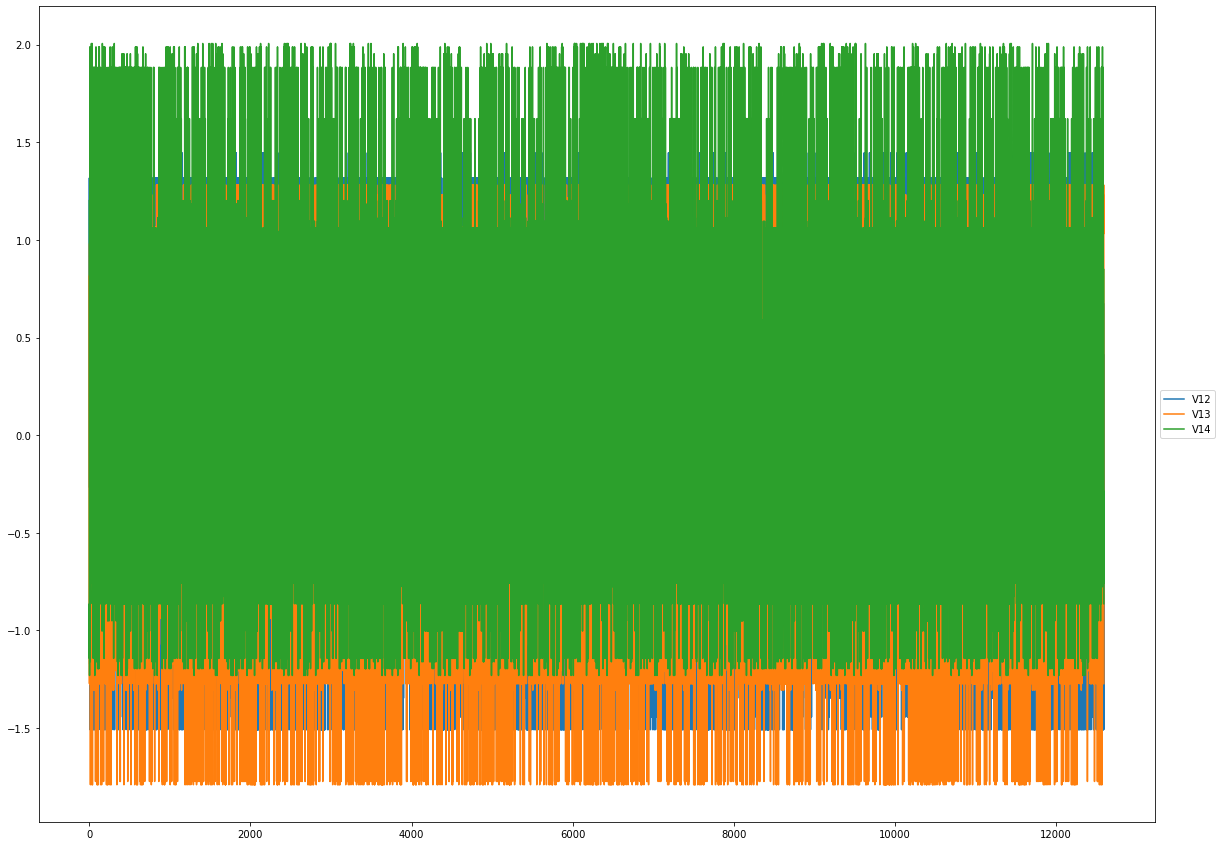

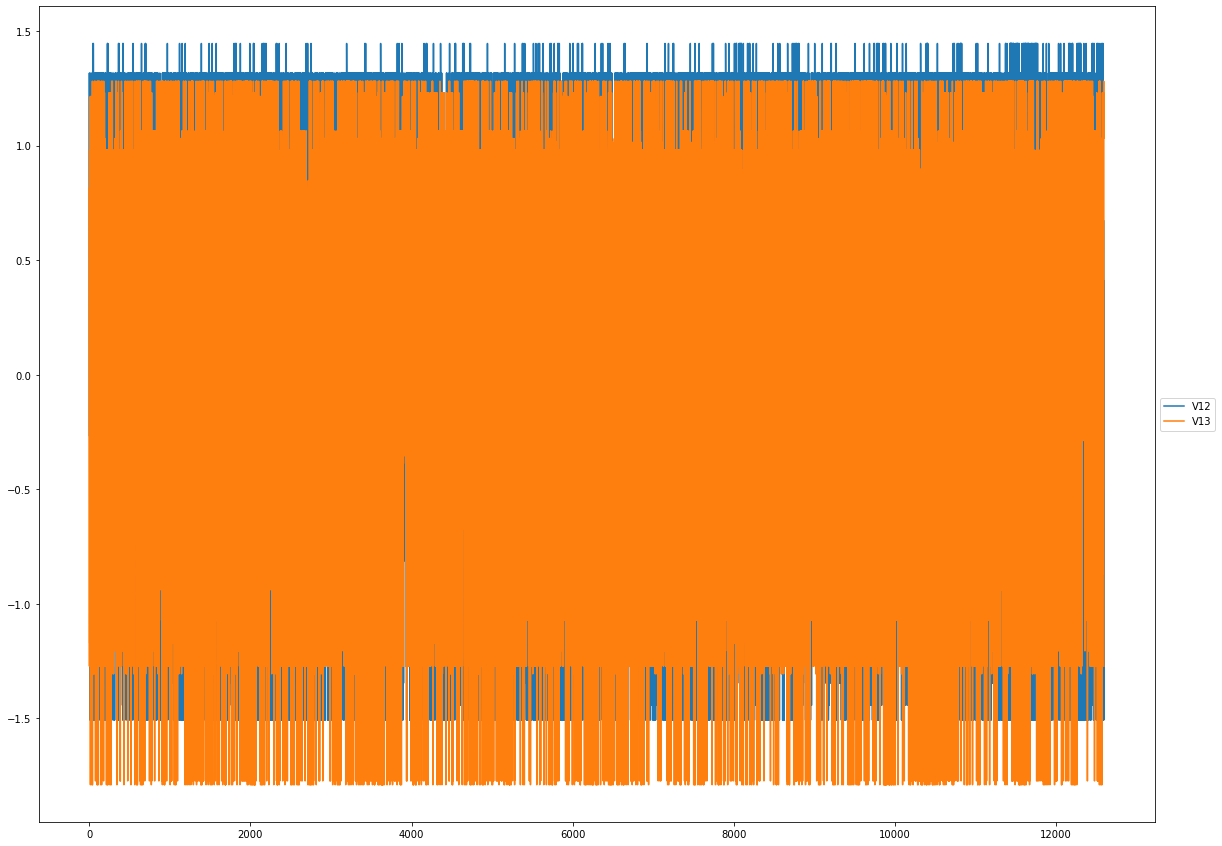

In [3]:




print("## Data:")
print(data)

print("## Head:")
print(data.head())

print("## Tail:")
print(data.tail())

print("## Info:")
data.info()

# plotting multivariate data
pd.plotting.scatter_matrix(data.loc[:, "V2":"V14"], diagonal="kde", figsize=(20, 15))
plt.show()

for i in range(2, 14):
    sns.lmplot(x="V" + str(i), y="V" + str(i + 1), data=data, hue="V1", fit_reg=False)

ax = data[["V2", "V3", "V4", "V5", "V6", "V7", "V8", "V9", "V10", "V11", "V12", "V13", "V14"]].plot(figsize=(20, 15))
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

ax = data[["V2", "V3", "V4", "V5", "V6"]].plot(figsize=(20, 15))
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

ax = data[["V7", "V8", "V9", "V10", "V11"]].plot(figsize=(20, 15))
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

ax = data[["V12", "V13", "V14"]].plot(figsize=(20, 15))
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

ax = data[["V12", "V13"]].plot(figsize=(20, 15))
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# calculating summary statistics for multivariate data

print(X.apply(np.mean))
print(X.apply(np.std))
print(X.apply(np.max))
print(X.apply(np.min))




In [4]:
# means and variances per group
def print_mean_and_sd_by_group(variables, group_variable):
    data_group_by = variables.groupby(group_variable)

    print("## Means:")
    print(data_group_by.apply(np.mean))

    print("\n## Standard deviations:")
    print(data_group_by.apply(np.std))

    print("\n## Sample sizes:")
    print(pd.DataFrame(data_group_by.apply(len)))


print_mean_and_sd_by_group(X, y)




## Means:
          V2        V3        V4        V5        V6        V7        V8  \
V1                                                                         
1   0.014591  0.060121  0.055798  0.023073  0.026495  0.009727 -0.043738   
2  -0.018911  0.193667 -0.028733 -0.007369  0.012560  0.011725  0.005183   
3   0.012705 -0.006675 -0.004194 -0.015731  0.029955 -0.003006  0.000058   
4  -0.030726 -0.242662 -0.050361  0.007927 -0.061448  0.023977  0.062419   

          V9       V10       V11       V12       V13       V14  
V1                                                              
1   0.044642  0.036374 -0.027116  0.050857 -0.006877  0.004345  
2  -0.022640 -0.023862  0.011696 -0.031129 -0.002907  0.009193  
3   0.004379  0.020676  0.006724  0.013640  0.018472  0.003582  
4  -0.037791 -0.043913  0.015073 -0.047183 -0.008177 -0.017295  

## Standard deviations:
          V2        V3        V4        V5        V6        V7        V8  \
V1                                        

In [5]:
def calc_within_groups_variance(variable, group_variable):
    # find out how many values the group variable can take
    levels = sorted(set(group_variable))
    num_levels = len(levels)
    # get the mean and standard deviation for each group:
    num_total = 0
    denom_total = 0
    for level_i in levels:
        level_i_data = variable[group_variable == level_i]
        level_i_length = len(level_i_data)
        # get the standard deviation for group i:
        sdi = np.std(level_i_data)
        num_i = level_i_length * sdi ** 2
        denom_i = level_i_length
        num_total = num_total + num_i
        denom_total = denom_total + denom_i
    # calculate the within-groups variance
    v_w = num_total / (denom_total - num_levels)
    return v_w


print("## v_w:")
print(calc_within_groups_variance(X.V2, y))





## v_w:
0.9795852824592665


In [6]:
# between-groups variance and within-groups variance for a variable
def calc_between_groups_variance(variable, group_variable):
    # find out how many values the group variable can take
    levels = sorted(set(group_variable))
    num_levels = len(levels)
    # calculate the overall grand mean:
    grand_mean = np.mean(variable)
    # get the mean and standard deviation for each group:
    num_total = 0
    denom_total = 0
    for level_i in levels:
        level_i_data = variable[group_variable == level_i]
        level_i_length = len(level_i_data)
        # get the mean and standard deviation for group i:
        mean_i = np.mean(level_i_data)
        sdi = np.std(level_i_data)
        num_i = level_i_length * ((mean_i - grand_mean) ** 2)
        denom_i = level_i_length
        num_total = num_total + num_i
        denom_total = denom_total + denom_i
    # calculate the between-groups variance
    v_b = num_total / (num_levels - 1)
    return v_b


print("## v_b:")
print(calc_between_groups_variance(X.V2, y))




## v_b:
1.6368017468471312


In [7]:
def calc_separations(variables, group_variable):
    # calculate the separation for each variable
    for variable_name in variables:
        variable_i = variables[variable_name]
        v_w = calc_within_groups_variance(variable_i, group_variable)
        v_b = calc_between_groups_variance(variable_i, group_variable)
        sep = v_b / v_w
        print("variable", variable_name, "Vw=", v_w, "Vb=", v_b, "separation=", sep)


calc_separations(X, y)




variable V2 Vw= 0.9795852824592665 Vb= 1.6368017468471312 separation= 1.6709129630223833
variable V3 Vw= 0.9770311752967529 Vb= 98.10855389527705 separation= 100.41496768563053
variable V4 Vw= 0.9862705073586889 Vb= 7.090246343437467 separation= 7.188946937514853
variable V5 Vw= 0.9891102434452065 Vb= 0.9846199563570178 separation= 0.9954602764272783
variable V6 Vw= 0.9869050604458246 Vb= 5.684998568004333 separation= 5.76043106460128
variable V7 Vw= 0.8629811159728565 Vb= 0.3755370245098222 separation= 0.43516250536545226
variable V8 Vw= 0.9848646634726549 Vb= 6.224270521618074 separation= 6.319924708914986
variable V9 Vw= 0.9992245311579823 Vb= 4.362660392481903 separation= 4.36604612521482
variable V10 Vw= 0.9993019398264029 Vb= 4.525564618796687 separation= 4.528725942013943
variable V11 Vw= 1.0000549418290647 Vb= 1.300901364343487 separation= 1.3008298943697882
variable V12 Vw= 0.9986711937689837 Vb= 6.485027110332422 separation= 6.493655920782033
variable V13 Vw= 1.00027437448730

In [8]:
# between-groups covariance and within-groups covariance for two variables
def calc_within_groups_covariance(variable1, variable2, group_variable):
    levels = sorted(set(group_variable))
    num_levels = len(levels)
    cov_w = 0.0
    # get the covariance of variable 1 and variable 2 for each group:
    for level_i in levels:
        level_i_data1 = variable1[group_variable == level_i]
        level_i_data2 = variable2[group_variable == level_i]
        mean1 = np.mean(level_i_data1)
        mean2 = np.mean(level_i_data2)
        level_i_length = len(level_i_data1)
        # get the covariance for this group:
        term1 = 0.0
        for level_i_data1j, level_i_data2j in zip(level_i_data1, level_i_data2):
            term1 += (level_i_data1j - mean1) * (level_i_data2j - mean2)
        cov_group_i = term1  # covariance for this group
        cov_w += cov_group_i
    total_length = len(variable1)
    cov_w /= total_length - num_levels
    return cov_w


print("## cov_w:")
print(calc_within_groups_covariance(X.V8, X.V11, y))




## cov_w:
0.44941941755261433


## cov_b:
2.4509794328497256
p-value:	 0.031226068423538325
cor:		 0.019195667400126015
           V2        V3        V4        V5        V6        V7        V8  \
V2   1.000000  0.019196  0.070099  0.065156  0.111937 -0.124564 -0.163837   
V3   0.019196  1.000000  0.034941  0.029172  0.006365 -0.023426 -0.034739   
V4   0.070099  0.034941  1.000000 -0.055606  0.622463 -0.281981 -0.526301   
V5   0.065156  0.029172 -0.055606  1.000000 -0.433286 -0.350333 -0.609217   
V6   0.111937  0.006365  0.622463 -0.433286  1.000000 -0.503755 -0.440422   
V7  -0.124564 -0.023426 -0.281981 -0.350333 -0.503755  1.000000  0.702713   
V8  -0.163837 -0.034739 -0.526301 -0.609217 -0.440422  0.702713  1.000000   
V9   0.010613 -0.002579  0.015322  0.039771  0.027069 -0.007680 -0.072202   
V10  0.002847  0.005847 -0.016814  0.088512 -0.035693 -0.046204 -0.053259   
V11 -0.110564 -0.007384 -0.032544 -0.366351 -0.105709  0.339510  0.453024   
V12  0.105730  0.008733  0.192009  0.349490  0.165415 -0.295076 -

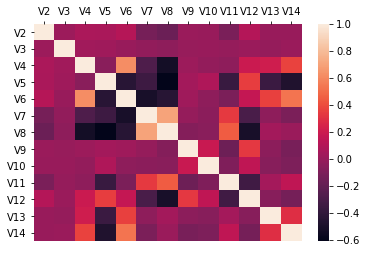

In [9]:
def calc_between_groups_covariance(variable1, variable2, group_variable):
    # find out how many values the group variable can take
    levels = sorted(set(group_variable))
    num_levels = len(levels)
    # calculate the grand means
    variable1mean = np.mean(variable1)
    variable2mean = np.mean(variable2)
    # calculate the between-groups covariance
    cov_b = 0.0
    for level_i in levels:
        level_i_data1 = variable1[group_variable == level_i]
        level_i_data2 = variable2[group_variable == level_i]
        mean1 = np.mean(level_i_data1)
        mean2 = np.mean(level_i_data2)
        level_i_length = len(level_i_data1)
        term1 = (mean1 - variable1mean) * (mean2 - variable2mean) * level_i_length
        cov_b += term1
    cov_b /= num_levels - 1
    return cov_b


print("## cov_b:")
print(calc_between_groups_covariance(X.V8, X.V11, y))

# calculating correlations for multivariate data
corr = stats.pearsonr(X.V2, X.V3)
print("p-value:\t", corr[1])
print("cor:\t\t", corr[0])

corr_mat = X.corr()
print(corr_mat)

plt.figure()
sns.heatmap(corr_mat, vmax=1., square=False).xaxis.tick_top()
plt.show()



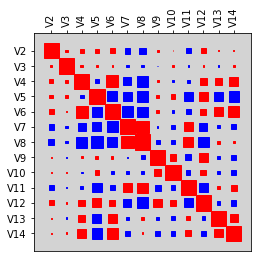

In [10]:
# Hinton diagram
def hinton(matrix, max_weight=None, ax=None):
    """Draw Hinton diagram for visualizing a weight matrix."""
    ax = ax if ax is not None else plt.gca()
    if not max_weight:
        max_weight = 2 ** np.ceil(np.log(np.abs(matrix).max()) / np.log(2))
    ax.patch.set_facecolor('lightgray')
    ax.set_aspect('equal', 'box')
    ax.xaxis.set_major_locator(plt.NullLocator())
    ax.yaxis.set_major_locator(plt.NullLocator())
    for (x, y), w in np.ndenumerate(matrix):
        color = 'red' if w > 0 else 'blue'
        size = np.sqrt(np.abs(w))
        rect = plt.Rectangle([x - size / 2, y - size / 2], size, size,
                             facecolor=color, edgecolor=color)
        ax.add_patch(rect)
    n_ticks = matrix.shape[0]
    ax.xaxis.tick_top()
    ax.set_xticks(range(n_ticks))
    ax.set_xticklabels(list(matrix.columns), rotation=90)
    ax.set_yticks(range(n_ticks))
    ax.set_yticklabels(matrix.columns)
    ax.grid(False)
    ax.autoscale_view()
    ax.invert_yaxis()


plt.figure()
hinton(corr_mat)
plt.show()




In [11]:
def most_highly_correlated(my_dataframe, num_to_report):
    # find the correlations
    cor_matrix = my_dataframe.corr()
    # set the correlations on the diagonal or lower triangle to zero,
    # so they will not be reported as the highest ones:
    cor_matrix *= np.tri(*cor_matrix.values.shape, k=-1).T
    # find the top n correlations
    cor_matrix = cor_matrix.stack()
    cor_matrix = cor_matrix.reindex(cor_matrix.abs().sort_values(ascending=False).index).reset_index()
    # assign human-friendly names
    cor_matrix.columns = ["FirstVariable", "SecondVariable", "Correlation"]
    return cor_matrix.head(num_to_report)


print(most_highly_correlated(X, 10))


# standardising variables
standardisedX = scale(X)
standardisedX = pd.DataFrame(standardisedX, index=X.index, columns=X.columns)

print(standardisedX.apply(np.mean))
print(standardisedX.apply(np.std))


# principal component analysis
pca = PCA().fit(standardisedX)




  FirstVariable SecondVariable  Correlation
0            V7             V8     0.702713
1            V4             V6     0.622463
2            V5             V8    -0.609217
3            V6            V14     0.528903
4            V4             V8    -0.526301
5            V8            V12    -0.506577
6            V6             V7    -0.503755
7            V5            V14    -0.475712
8            V8            V11     0.453024
9            V6             V8    -0.440422
V2     1.013045e-15
V3    -2.610811e-15
V4    -2.973675e-16
V5     2.278725e-15
V6     2.792505e-16
V7    -1.600770e-15
V8    -3.617490e-15
V9    -6.135759e-16
V10   -2.622785e-16
V11    5.098880e-16
V12   -1.813029e-15
V13    2.576945e-16
V14    1.255326e-17
dtype: float64
V2     1.0
V3     1.0
V4     1.0
V5     1.0
V6     1.0
V7     1.0
V8     1.0
V9     1.0
V10    1.0
V11    1.0
V12    1.0
V13    1.0
V14    1.0
dtype: float64


In [12]:
def pca_summary(pca, standardised_data, out=True):
    names = ["PC"+str(i) for i in range(1, len(pca.explained_variance_ratio_)+1)]
    a = list(np.std(pca.transform(standardised_data), axis=0))
    b = list(pca.explained_variance_ratio_)
    c = [np.sum(pca.explained_variance_ratio_[:i]) for i in range(1, len(pca.explained_variance_ratio_)+1)]
    columns = pd.MultiIndex.from_tuples([("sdev", "Standard deviation"), ("varprop", "Proportion of Variance"), ("cumprop", "Cumulative Proportion")])
    summary = pd.DataFrame(list(zip(a, b, c)), index=names, columns=columns)
    if out:
        print("Importance of components:")
        print(summary)
    return summary


summary = pca_summary(pca, standardisedX)
print(summary.sdev)
print(np.sum(summary.sdev**2))






Importance of components:
                   sdev                varprop               cumprop
     Standard deviation Proportion of Variance Cumulative Proportion
PC1        1.775038e+00           2.423662e-01              0.242366
PC2        1.609834e+00           1.993512e-01              0.441717
PC3        1.118025e+00           9.615233e-02              0.537870
PC4        1.001159e+00           7.710150e-02              0.614971
PC5        9.826995e-01           7.428448e-02              0.689256
PC6        9.311747e-01           6.669895e-02              0.755955
PC7        9.016471e-01           6.253596e-02              0.818491
PC8        8.259709e-01           5.247907e-02              0.870970
PC9        7.486865e-01           4.311780e-02              0.914087
PC10       7.238643e-01           4.030612e-02              0.954394
PC11       6.659651e-01           3.411612e-02              0.988510
PC12       3.864890e-01           1.149029e-02              1.000000
PC13    

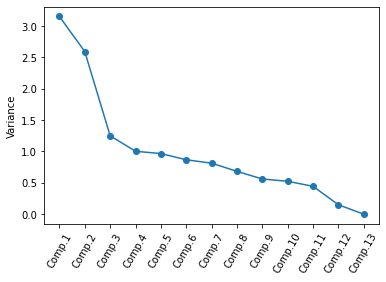

      Standard deviation
PC1         3.150760e+00
PC2         2.591566e+00
PC3         1.249980e+00
PC4         1.002319e+00
PC5         9.656983e-01
PC6         8.670864e-01
PC7         8.129675e-01
PC8         6.822279e-01
PC9         5.605314e-01
PC10        5.239796e-01
PC11        4.435095e-01
PC12        1.493737e-01
PC13        8.096484e-20
[ 0.13470828  0.02682629  0.32436426  0.25169034  0.32000986 -0.44009053
 -0.52413332  0.11040225  0.06864276 -0.31271273  0.35205127  0.02700835
  0.04912048]
1.0000000000000002


In [13]:
# how many principal components to retain
def scree_plot(pca, standardised_values):
    y = np.std(pca.transform(standardised_values), axis=0)**2
    x = np.arange(len(y)) + 1
    plt.plot(x, y, "o-")
    plt.xticks(x, ["Comp."+str(i) for i in x], rotation=60)
    plt.ylabel("Variance")
    plt.show()


plt.figure()
scree_plot(pca, standardisedX)

print(summary.sdev**2)

# loadings for the principal components
print(pca.components_[0])
print(np.sum(pca.components_[0]**2))



In [14]:
def calc_pc(variables, loadings):
    # find the number of samples in the data set and the number of variables
    num_samples, num_variables = variables.shape
    # make a vector to store the component
    pc = np.zeros(num_samples)
    # calculate the value of the component for each sample
    for i in range(num_samples):
        value_i = 0
        for j in range(num_variables):
            value_ij = variables.iloc[i, j]
            loading_j = loadings[j]
            value_i = value_i + (value_ij * loading_j)
        pc[i] = value_i
    return pc


print(calc_pc(standardisedX, pca.components_[0]))
print(pca.transform(standardisedX)[:, 0])

print(pca.components_[1])
print(np.sum(pca.components_[1]**2))

[-1.39273035  2.01303144  1.93084621 ...  1.28272404 -1.31502625
  1.63956254]
[-1.39273035  2.01303144  1.93084621 ...  1.28272404 -1.31502625
  1.63956254]
[-0.00084494 -0.00117936  0.31500494 -0.47325379  0.45751533 -0.02893636
  0.06733061 -0.11729746 -0.12498452  0.19592819 -0.1636434   0.36485204
  0.48419601]
1.0000000000000007


## Means:
          V2        V3        V4        V5        V6        V7        V8  \
V1                                                                         
1   0.018850  0.059625  0.059296  0.020120  0.023338 -0.000709 -0.047382   
2  -0.014998  0.193165 -0.025762 -0.010491  0.009318  0.001441  0.001885   
3   0.016945 -0.007167 -0.001070 -0.018899  0.026819 -0.014418 -0.003277   
4  -0.026935 -0.243144 -0.047526  0.004890 -0.065140  0.014632  0.059524   

          V9       V10       V11       V12       V13       V14  
V1                                                              
1   0.044540  0.036336 -0.027065  0.050739 -0.006898  0.004292  
2  -0.022743 -0.023898  0.011747 -0.031250 -0.002929  0.009139  
3   0.004276  0.020639  0.006774  0.013521  0.018450  0.003529  
4  -0.037895 -0.043949  0.015123 -0.047305 -0.008198 -0.017348  

## Standard deviations:
          V2        V3        V4        V5        V6        V7        V8  \
V1                                        

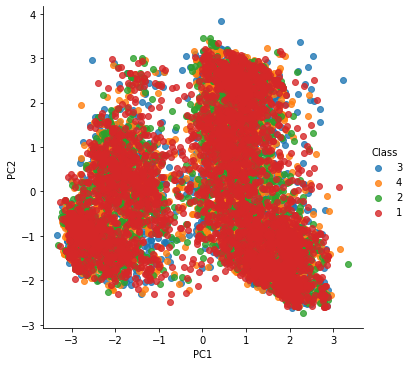

In [15]:
# scatter plots of the principal components
def pca_scatter(pca, standardised_values, classifs):
    foo = pca.transform(standardised_values)
    bar = pd.DataFrame(list(zip(foo[:, 0], foo[:, 1], classifs)), columns=["PC1", "PC2", "Class"])
    sns.lmplot(x="PC1", y="PC2", data=bar, hue="Class", fit_reg=False)



pca_scatter(pca, standardisedX, y)
print_mean_and_sd_by_group(standardisedX, y)

In [16]:

 # normalize

[[ 0.0272146   0.13893056  0.11888293  0.02011075  0.01334658  0.13499639
  -0.06587852  0.06703999  0.06615004 -0.02866228  0.0472115  -0.02321197
   0.01224167]
 [-0.04796065  0.47142121 -0.21315324 -0.00631796  0.15272531  0.11361882
  -0.17761615 -0.02136051 -0.04053204  0.04034072 -0.08605582 -0.01818809
   0.0064964 ]
 [ 0.03568903 -0.01522233 -0.06366879 -0.04535481  0.07076937 -0.02103544
  -0.01792298 -0.0087212   0.0506519   0.04283104  0.0370711   0.02784706
  -0.03487476]
 [-0.0264129  -0.58773548  0.1178418   0.02875455 -0.2310144  -0.24736538
   0.26272524 -0.05302133 -0.09643819 -0.04700532 -0.01718572  0.01592557
   0.01558706]]


[[-0.07479805 -0.07855375]
 [-0.19415861  0.08322018]
 [-0.00099882 -0.00874494]
 [ 0.27112681  0.0283953 ]]


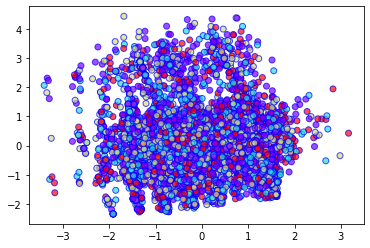

In [28]:
sc = StandardScaler()
X = sc.fit_transform(X)
le = LabelEncoder()
y = le.fit_transform(y)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
 
# apply Linear Discriminant Analysis
lda = LinearDiscriminantAnalysis(n_components=2)
X = lda.fit_transform(X, y)
#X_tes = lda.transform(X_test)
 
# plot the scatterplot
plt.scatter(
    X[:,0],X[:,1],c=y,cmap='rainbow',
  alpha=0.7,edgecolors='b'
)
print(lda.coef_)